<a href="https://colab.research.google.com/github/Danicoder/Especializacion_IA_BigData/blob/main/RegresionLineal_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ALGORITMO DE REGRESION LINEAL EXTRA

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.linear_model import LinearRegression

In [8]:
# Subir el archivo
uploaded = files.upload()

Saving salarios.csv to salarios (3).csv


In [23]:
# Leer el archivo CSV y mostrarlo
dataset =pd.read_csv('salarios.csv')
print(f"Número de filas y columnas{dataset.shape}")
dataset.head(11)

Número de filas y columnas(11, 6)


,rank,disciplina,phd,serviço,gênero,salário
0,Prof,B,56,49,Masculino,186960
1,Prof,A,12,34,Feminino,93000
2,Prof,B,13,37,Masculino,66000
3,Prof,C,25,75,Masculino,77000
4,Prof,A,24,55,Feminino,336600
5,Prof,A,26,50,Masculino,170000
6,Prof,B,50,24,Feminino,120000
7,Prof,B,35,22,Feminino,130000
8,Prof,A,45,50,Masculino,144000
9,Prof,C,22,23,Masculino,88000


Filas y columnas

In [46]:
x_salario= dataset.iloc[0:12,5:6].values
y_años= dataset.iloc[0:12,3:4].values
print(f"x:{x_salario.flatten()}") #.flatten() convierte a una sola dimensión el marray
print(f"y:{y_años.flatten()}")

x:[186960  93000  66000  77000 336600 170000 120000 130000 144000  88000
 105000]
y:[49 34 37 75 55 50 24 22 50 23 14]


Datos de prueba

In [48]:
#Entrenamiento
x_train,x_test,y_train,y_test = train_test_split(x_salario,y_años,test_size=0.2,random_state=0)
print(f"Entrenamiento X:{x_train.flatten()}")
print(f"Prueba X:{x_test.flatten()}")
#Prueba
print(f"Entrenamiento Y:{y_train.flatten()}")
print(f"Prueba Y:{y_test.flatten()}")

Entrenamiento X:[105000 120000  93000 130000 144000  77000 186960 170000]
Prueba X:[336600  88000  66000]
Entrenamiento Y:[14 24 34 22 50 75 49 50]
Prueba Y:[55 23 37]


Entrenamiento

In [55]:
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train) # resgape convierte un array unidimensional en un array bidimensional

LinearRegression()

Parámetro de cálculo

In [62]:
predicion = regressor.predict(x_test)

print(f"Coeficiente w0:{regressor.coef_}")
print(f"Coeficiente w1:{regressor.coef_[0]}")
print(f"Error Cuadrático Medio (MSE): {mean_squared_error(y_test, predicion)}")
print(f"Error Absoluto Medio(MAE): {mean_absolute_error(y_test, predicion)}")
print(f"Precision Entrenamiento del Algoritmo de Regresion Lineal : {regressor.score(x_train.reshape(-1,1), y_train)}")
print(f"Precision Prueba de determinación del conjunto de prueba:  {regressor.score(x_test.reshape(-1,1), y_test)}")

Coeficiente w0:[[2.27981175e-05]]
Coeficiente w1:[2.27981175e-05]
Error Cuadrático Medio (MSE): 120.89565750266287
Error Absoluto Medio(MAE): 9.22110638623466
Precision Entrenamiento del Algoritmo de Regresion Lineal : 0.0018428376462461538
Precision Prueba de determinación del conjunto de prueba:  0.29529733320986673


Gráfico

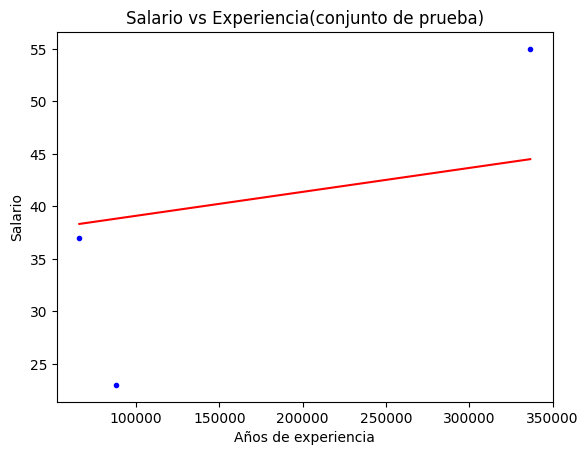

In [70]:
fig,ax = plt.subplots()
plt.plot(x_test,y_test,"b.",label='Actual') #Datos (en azul y con puntos)
plt.plot(x_test,predicion,"r-",label='Predicción') #Hipótesis (en rojo)
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Salario vs Experiencia(conjunto de prueba)')
plt.show()